In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [6]:
df = pd.read_csv("Black_Friday_Sales_Prediction/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [7]:
#since the columns user_id, product_id,product_category_2,product_category_3 don't add any useful unfo we drop them 
df.drop(['User_ID', 'Product_ID','Product_Category_2','Product_Category_3'], axis=1, inplace=True)

In [8]:
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
5,M,26-35,15,A,3,0,1,15227
6,M,46-50,7,B,2,1,1,19215
7,M,46-50,7,B,2,1,1,15854
8,M,46-50,7,B,2,1,1,15686
9,M,26-35,20,A,1,1,8,7871


In [18]:
age_grpby = df.groupby("Age").sum()
age_grpby

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Age,,,,,,,
0-17,FFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFMMMFFFF...,132309,AAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,222233333333333324+4+4+4+4+4+4+4+4+4+331111111...,0,76775,134913183
18-25,FFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMF...,671348,BBBBBBBBBBBBBBBBAAAAAAAAAAAAAACCCAAAAAAAAAABBC...,33333333333333304+4+4+4+4+4+4+4+4+4+4+4+4+4+4+...,21116,509371,913848675
26-35,MMMMMMMMMMMMMMMMFFFMMMMMMMMMMMFFFMMMMMMMMMMMMM...,1734073,AAAAAACCCCCCCCCCCCCCCAAAAAAAAAAAABBBBBBBBBBBBC...,3111114+4+4+4+4+4+0000111221111111113332222222...,86291,1166945,2031770578
36-45,MFFFFFFFFFFFFFFFFFFMFFMMMMMMMMMMMMMMMMFFFMMMMF...,972225,BBBBBBBBBBBBBBBBBBBCCCBBBBBBBBBBBBCCCCCCCCCCCA...,14+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+000333333...,43636,604438,1026569884
46-50,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFF...,389239,BBBCCCAAAAAAAAAAAAAAACCCCCCCBBBBBBBBBBBBBAAAAA...,2223331111111111111114+4+4+4+4+4+4+33333333333...,33011,262424,420843403
51-55,FFFFMMMMMFFFFFFFFFFFFFFFMMFFFMMMMMMMMMMMMMMMMM...,339198,AAAACCCCCBBBBBBBBBBBBBBBCCCCCBBBBBBBBBBBBBBBBB...,11110004+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+114+4...,27662,222313,367099644
55+,MMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,204346,CCCCCCCCCCCCCCCCCCCCCCCCCACCAAAACCCCAACCCCCCCC...,4+22223331111111111111111112222222222001111111...,13621,130450,200767375


<Axes: ylabel='Purchase'>

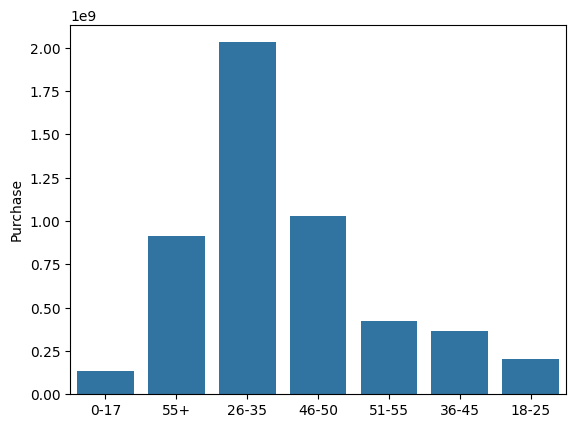

In [33]:
# Now lets plot a barplot of age vs total purchased amount in that age group 
sns.barplot(x=df['Age'].unique() , y = age_grpby['Purchase'])

In [39]:
# Gender vs mean purchase amount
marital_status_grpby = df.groupby('Marital_Status')['Purchase'].mean()
marital_status_grpby

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [40]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [41]:
df.groupby('Occupation')['Purchase'].mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Density'>

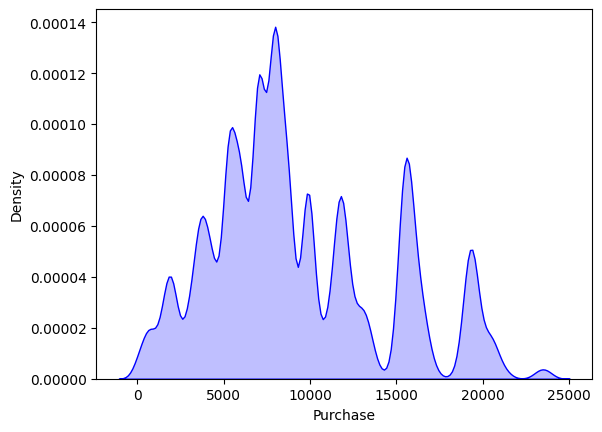

In [49]:
sns.kdeplot(df['Purchase'],fill=True, color='blue')

<Axes: xlabel='Gender', ylabel='Age'>

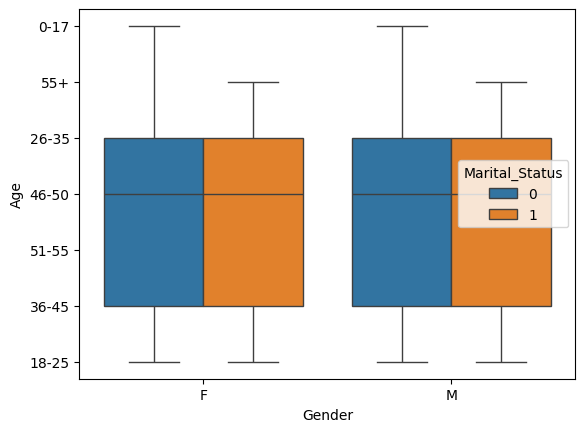

In [53]:
sns.boxplot(y='Age', x = 'Gender', data=df, hue='Marital_Status')

In [57]:
df.groupby('Product_Category_1')['Purchase'].mean()

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

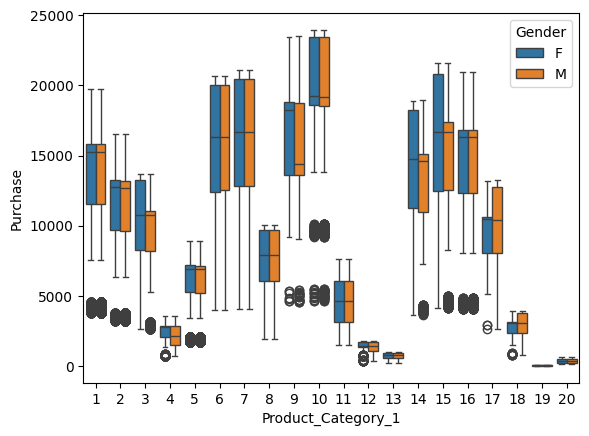

In [55]:
sns.boxplot(x=df['Product_Category_1'], y=df['Purchase'], hue=df['Gender'])

In [ ]:
#suppose i made some chnges here